# Assignment 06

## Due: See Date in Moodle

In this assignment you will use intermediate and advanced features in `pandas`.

To receive a **full credit** for this assignment, you must complete all exercises.

## This Week's Assignment

In this week's assignment, you will perform exploratory data analysis on a data set. This includes, but is not limited to the following:
    
- executing various data moves (see **[Data Moves](https://escholarship.org/uc/item/0mg8m7g6)**).

- constructing visualizations

- conveying your findings through written communication.

### Notes

- Adhere to good programming practices, utilizing descriptive variable names, appropriate spacing for readability, and adding comments to your code. 

- Ensure written responses maintain correct spelling, complete sentences, and proper grammar.

**Name:** Mahesh Jammu

**Section:** 001

**Date:** 03/18/2024

Before we get started let's summarize the core data moves that we've being using this semester.

- _Filtering_ is used for scoping and exploration. It is conceptually a prerequisite for grouping and sampling.

- _Grouping_ is fundamental for comparing. 
 
- _Summarizing_ creates aggregate measures that describe a group.

- A _hierarchical organization_ can be equivalent to grouping, and provides an alternative way of thinking about summarizing. 

- _Calculating_ a new attribute involves describing a new idea in terms of other attributes. 

- _Merging or joining_ datasets through a relation is a way to add cases or computed attributes from outside the original dataset. 

Other data moves may join this core set of six. For example:

- Data moves facilitate creating new ways of displaying data (_visualization_).

- _Sorting_ a dataset can give important insights into patterns in the data, and is an essential element in helping some visualizations communicate more effectively.

- There are a number of ways to go about _cleaning_ a dataset so that it can be imported for analysis. This can include merging, calculating (especially _recoding_), and _stacking_.

- _Sampling_ and related processes are important to simulation-based inference. _Sampling_ is related to filtering. A sampling distribution collects summary values from these samples, and can be facilitated by hierarchy.

Erickson, T., Wilkerson, M., Finzer, W., & Reichsman, F. (2019). Data Moves. Technology Innovations in Statistics Education, 12(1). [http://dx.doi.org/10.5070/T5121038001](http://dx.doi.org/10.5070/T5121038001) Retrieved from [https://escholarship.org/uc/item/0mg8m7g6](https://escholarship.org/uc/item/0mg8m7g6)

## Data Moves

Now, we will explore six specific data moves in further detail, namely, **filtering**, **grouping**, **summarizing**, **calculating**, **merging/joining**, and **making hierarchy**. While not an exhaustive list, these seem useful to examine as a core set of data moves as we have consistently observed some of these six moves in our own work throughout the semester.

## United States Broadband Usage Percentages Dataset

We are publishing [datasets we developed as part of our efforts with Microsoft’s Airband Initiative to help close the rural broadband gap](https://github.com/microsoft/USBroadbandUsagePercentages?tab=readme-ov-file). The data can be used for the purpose of analyzing, understanding, improving, or addressing problems related to broadband access.

The datasets consist of data derived from anonymized data Microsoft collects as part of our ongoing work to improve the performance and security of our software and services. The data does not include any PII information including IP Address. We also suppress any location with less than 20 devices. Other than the aggregated data shared in this data table, no other data is stored during this process. We estimate broadband usage by combining data from multiple Microsoft services. The data from these services are combined with the number of households per county and zip code. Every time a device receives an update or connects to a Microsoft service, we can estimate the throughput speed of a machine. We know the size of the package sent to the computer, and we know the total time of the download. We also determine zip code level location data via reverse IP. Therefore, we can count the number of devices that have connected to the internet at broadband speed per each zip code based on the FCC’s definition of broadband that is 25mbps per download. Using this method, we estimate that ~120.4 million people in the United States are not using the internet at broadband speeds.

**By:** John Kahan - Vice President, Chief Data Analytics Officer | Juan Lavista Ferres - Chief Scientist, Microsoft AI for Good Research Lab

**For more information about this repository go to:** 

- https://github.com/microsoft/USBroadbandUsagePercentages?tab=readme-ov-file

**Additional Information:**

- [Understanding the Relationship Between ZIPs and Cities/Counties](https://www.unitedstateszipcodes.org/zip-code-database/matching-to-cities-and-counties/#:~:text=The%20boundaries%20of%20a%20ZIP,are%20used%20in%20common%20conversation.)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8] 
plt.rcParams['figure.dpi'] = 100

### Initial Exploratory Data Analysis

In [2]:
# The + is being used for concatenation, and the \ is being used for line continuation, 
# especially in the middle of a statement spread across multiple lines.

# In Python code, a backslash at the end of a line is used to indicate that the 
# line of code continues on the next line. This can make your code more readable 
# by breaking long lines into smaller, more manageable pieces. 

url = 'https://raw.githubusercontent.com/microsoft/USBroadbandUsagePercentages' + \
      '/master/dataset/broadband_data_zipcode.csv'

broadband = pd.read_csv(url)
broadband.head(5)

,ST,COUNTY NAME,COUNTY ID,POSTAL CODE,BROADBAND USAGE,ERROR RANGE (MAE)(+/-),ERROR RANGE (95%)(+/-),MSD
0,SC,Abbeville,45001,29639,0.948,0.034,0.110,0.002
1,SC,Abbeville,45001,29620,0.398,0.002,0.007,0.000
2,SC,Abbeville,45001,29659,0.206,0.152,0.608,0.043
3,SC,Abbeville,45001,29638,0.369,0.010,0.031,-0.001
4,SC,Abbeville,45001,29628,0.221,0.014,0.043,0.000


**Question 1.** To initiate the initial analysis of the `broadband` dataframe, execute three distinct `pandas` `DataFrame` nethods, excluding `.describe()`.

In [3]:
broadband.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32735 entries, 0 to 32734
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ST                      32735 non-null  object 
 1   COUNTY NAME             32735 non-null  object 
 2   COUNTY ID               32735 non-null  int64  
 3   POSTAL CODE             32735 non-null  int64  
 4   BROADBAND USAGE         32735 non-null  float64
 5   ERROR RANGE (MAE)(+/-)  32735 non-null  float64
 6   ERROR RANGE (95%)(+/-)  32735 non-null  float64
 7   MSD                     32735 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 2.0+ MB


In [4]:
broadband.shape

(32735, 8)

In [5]:
broadband.sample(5)

,ST,COUNTY NAME,COUNTY ID,POSTAL CODE,BROADBAND USAGE,ERROR RANGE (MAE)(+/-),ERROR RANGE (95%)(+/-),MSD
2764,AK,Bristol Bay Borough,2060,99633,0.000,0.050,0.170,0.007
24829,WI,Richland,55103,54664,0.706,0.020,0.061,0.000
17726,OH,Mahoning,39099,44509,0.627,0.002,0.007,0.000
12451,FL,Highlands,12055,33857,0.017,0.018,0.054,0.000
24406,WV,Raleigh,54081,25818,0.504,0.065,0.228,0.013


### Filtering

- **Filtering** is used for scoping and exploration. It is conceptually a prerequisite for grouping and sampling.

**Question 2.** Filter the dataset to include only records pertaining to the state of your choice. Save the filtered data to a new dataframe, naming it with the corresponding two-letter abbreviation of the state.

**a.** Use boolean indexing.

In [6]:
mask = broadband['ST'] == "CA"

In [7]:
CA = broadband[mask]

CA.head(5)

,ST,COUNTY NAME,COUNTY ID,POSTAL CODE,BROADBAND USAGE,ERROR RANGE (MAE)(+/-),ERROR RANGE (95%)(+/-),MSD
236,CA,Alameda,6001,94705,0.650,0.002,0.007,0.0
237,CA,Alameda,6001,94704,0.284,0.002,0.005,0.0
238,CA,Alameda,6001,94555,0.987,0.001,0.004,0.0
239,CA,Alameda,6001,94538,1.000,0.001,0.002,0.0
240,CA,Alameda,6001,94541,0.965,0.001,0.002,0.0


**b.** Use the `.query` dataframe method.

In [8]:
broadband.query('ST == "CA"')

,ST,COUNTY NAME,COUNTY ID,POSTAL CODE,BROADBAND USAGE,ERROR RANGE (MAE)(+/-),ERROR RANGE (95%)(+/-),MSD
236,CA,Alameda,6001,94705,0.650,0.002,0.007,0.000
237,CA,Alameda,6001,94704,0.284,0.002,0.005,0.000
238,CA,Alameda,6001,94555,0.987,0.001,0.004,0.000
239,CA,Alameda,6001,94538,1.000,0.001,0.002,0.000
240,CA,Alameda,6001,94541,0.965,0.001,0.002,0.000
...,...,...,...,...,...,...,...,...
32674,CA,Yuba,6115,95981,0.079,0.152,0.608,0.043
32675,CA,Yuba,6115,95961,0.803,0.002,0.005,0.000
32676,CA,Yuba,6115,95922,0.000,0.041,0.136,0.004
32677,CA,Yuba,6115,95918,0.111,0.010,0.031,-0.001


**c.** Display the dimensions of the dataframe.

In [9]:
print("Number of rows:", broadband.shape[0])
print("Number of columns:", broadband.shape[1])

Number of rows: 32735
Number of columns: 8


### Summarizing

- **Summarizing** creates aggregate measures that describe a group.

**Question 3.** What is the average broadband usage in the state you chose?

In [10]:
CA['BROADBAND USAGE']

236      0.650
237      0.284
238      0.987
239      1.000
240      0.965
         ...  
32674    0.079
32675    0.803
32676    0.000
32677    0.111
32678    0.125
Name: BROADBAND USAGE, Length: 1736, dtype: float64

In [11]:
np.mean(CA['BROADBAND USAGE'])

0.5014648617511521

**Question 4.** Produce a visualization illustrating the distribution of broadband usage across the state you chose.

**a.** Using `matplotlib.pyplot`.

**Note:** `matplotlib.pyplot` is a collection of command style functions. Each `pyplot` function makes some changes to a figure, such as creating a figure, creating a plotting area in a figure, plotting some lines in a plotting area, adding labels to the plot, etc.

`matplotlib.pyplot` is commonly imported under the alias `plt` for convenience:

```
import matplotlib.pyplot as plt
```
Here are some common functions provided by matplotlib.pyplot:

- `plt.scatter()`: Make a scatter plot.
- `plt.bar()`: Make a bar plot.
- `plt.hist()`: Plot a histogram.
- `plt.xlabel()`: Set the label for the $x-$axis.
- `plt.ylabel()`: Set the label for the $y-$axis.
- `plt.title()`: Set a title for the Axes.
- `plt.legend()`: Place a legend on the `Axes`.

**Note:** An `Axes` in Matplotlib is the primary element used for plotting data.

<img src="https://matplotlib.org/stable/_images/sphx_glr_anatomy_001.png" width="500" height="400" />

In [12]:
CA['BROADBAND USAGE']

236      0.650
237      0.284
238      0.987
239      1.000
240      0.965
         ...  
32674    0.079
32675    0.803
32676    0.000
32677    0.111
32678    0.125
Name: BROADBAND USAGE, Length: 1736, dtype: float64

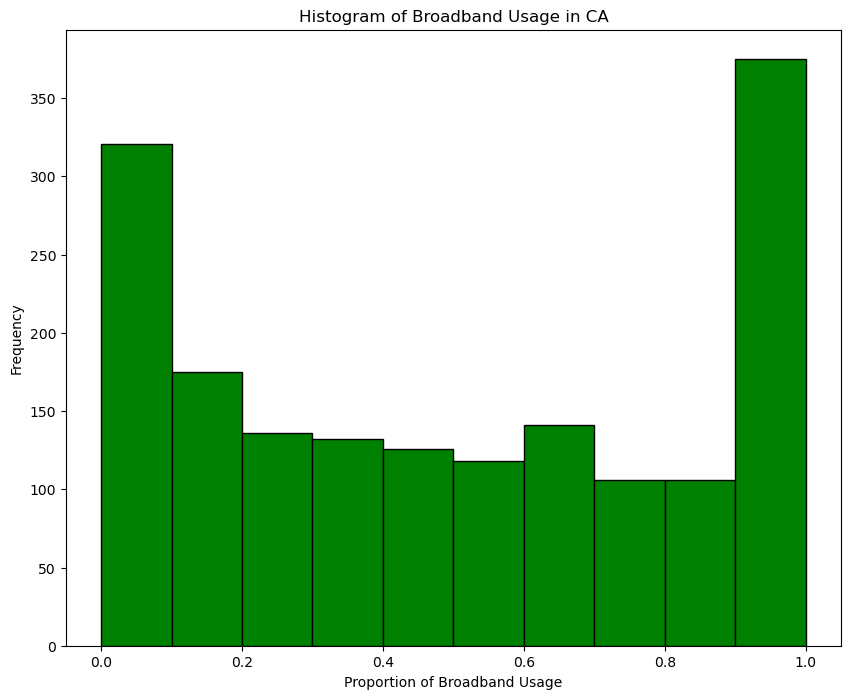

In [13]:
plt.hist(x=CA['BROADBAND USAGE'], bins=10, color='green', edgecolor='black')

plt.xlabel('Proportion of Broadband Usage')
plt.ylabel('Frequency')
plt.title('Histogram of Broadband Usage in CA');

**b.** Using the `.plot` `pandas` `DataFrame` method.

**Note:** In `pandas`, you can use the `.plot()` method to create basic plots directly from `DataFrame` objects. This method is a wrapper around `matplotlib.pyplot.plot()`. Pandas provides a variety of visualization tools through its integration with `matplotlib`. 

Here are some common visualizations you can create using `pandas`:

- `df.plot(kind='line')`: Make a line plot
- `df.plot(kind='scatter', x='column1', y='column2')`: Make a scatter plot 
- `df.plot(kind='bar')` or `df.plot(kind='barh')` for horizontal bars: Make a bar plot 
- `df.plot(kind='hist')` or `df.plot.hist()`: Make a histogram 
- `df.boxplot()` or `df.plot.hist()`: Make a histogram 

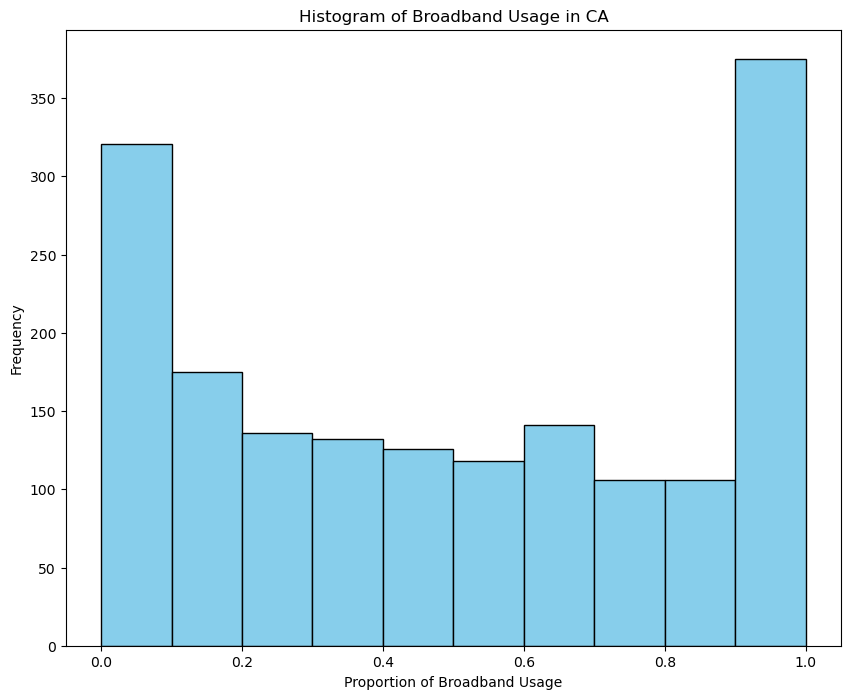

In [14]:
CA['BROADBAND USAGE'].hist(bins=10, color='skyblue', edgecolor='black', grid=False)

plt.xlabel('Proportion of Broadband Usage')
plt.ylabel('Frequency')
plt.title('Histogram of Broadband Usage in CA');

### Calculating

- **Calculating** a new attribute involves describing a new idea in terms of other attributes.

**Question 5.** Calculate the mean and median braodband usage in the state you chose.

In [25]:
state = CA['BROADBAND USAGE']

mean_broadband = np.mean(CA['BROADBAND USAGE'])
median_broadband = np.median(CA['BROADBAND USAGE'])


print("The mean broadband usage in California is", mean_broadband)
print("The median broadband usage in California is", median_broadband)

The mean broadband usage in California is 0.5014648617511521
The median broadband usage in California is 0.48


**Question 6.** Use the `np.where` function to create a new column named `USAGE`, which designates a county as `HIGH` if its braodband usage is equal to or below the mean, and as `LOW` when the braodband usage surpasses the mean.

**Note:** The `np.where` function is from the `NumPy` package. It allows for conditional selection and can be used to create new array elements (which can be added to `pandas` `DataFrame` objects based on a condition. To learn more about the `np.where` function from ChatGPT click [**here**](https://docs.google.com/document/d/1ijGDB0yk4VPMUNv7mFIqq8kQtqm-Iy-ZwzpdnR_ehTw/edit?usp=sharing).

In [29]:
CA['USAGE'] = np.where(CA['BROADBAND USAGE'] <= mean_broadband, 'HIGH', 'LOW')
print(CA)

       ST COUNTY NAME  COUNTY ID  POSTAL CODE  BROADBAND USAGE  \
236    CA     Alameda       6001        94705            0.650   
237    CA     Alameda       6001        94704            0.284   
238    CA     Alameda       6001        94555            0.987   
239    CA     Alameda       6001        94538            1.000   
240    CA     Alameda       6001        94541            0.965   
...    ..         ...        ...          ...              ...   
32674  CA        Yuba       6115        95981            0.079   
32675  CA        Yuba       6115        95961            0.803   
32676  CA        Yuba       6115        95922            0.000   
32677  CA        Yuba       6115        95918            0.111   
32678  CA        Yuba       6115        95925            0.125   

       ERROR RANGE (MAE)(+/-)  ERROR RANGE (95%)(+/-)    MSD USAGE  
236                     0.002                   0.007  0.000   LOW  
237                     0.002                   0.005  0.000  HIGH  


/tmp/ipykernel_178946/2137676992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA['USAGE'] = np.where(CA['BROADBAND USAGE'] <= mean_broadband, 'HIGH', 'LOW')


**Question 7.** Produce a visualization illustrating the frequency of high and low broadband usage across the state you chose.

**Note:** You can use either `matplotlib` or `pandas`.

First let's construct a frequency table to tally the counts for each size category. What values do you anticipate for these counts?

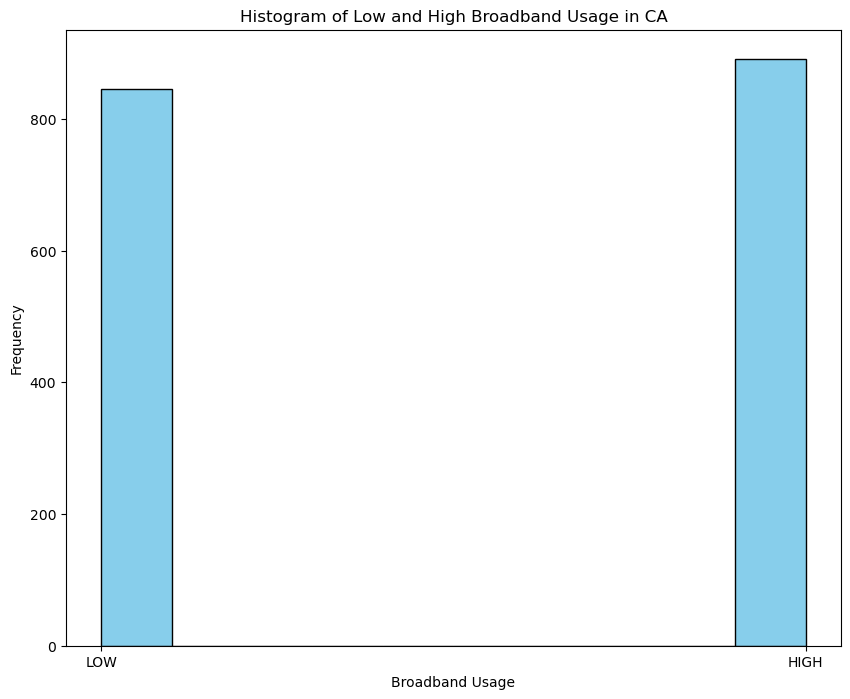

In [32]:
CA['USAGE'].hist(bins=10, color='skyblue', edgecolor='black', grid=False)

plt.xlabel('Broadband Usage')
plt.ylabel('Frequency')
plt.title('Histogram of Low and High Broadband Usage in CA');

### Grouping

- **Grouping** is fundamental for comparing. 

**Note:** The `.groupby` method in `pandas` is a tool for data aggregation, allowing you to split data into groups based on some criteria, apply a function to each group independently, and combine the results into a data structure. To learn more about the `.groupby` method from ChatGPT click [**here**](https://docs.google.com/document/d/1j5vDYqkDiIug7YJyDUF47ghToEWDK-Nu_W38580Uyb4/edit?usp=sharing).

**Question 8.** Use the `.groupby` method to group the state you chose by county name.

**Note:** You can save the output to an object named `grps`.

In [36]:
grps = CA.groupby('COUNTY NAME')


**a.** List the keys of your `grps` `GroupBuy` object.

In [37]:
grps.groups.keys()

dict_keys(['Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras', 'Colusa', 'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn', 'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen', 'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino', 'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange', 'Placer', 'Plumas', 'Riverside', 'Sacramento', 'San Benito', 'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin', 'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara', 'Santa Cruz', 'Shasta', 'Sierra', 'Siskiyou', 'Solano', 'Sonoma', 'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne', 'Ventura', 'Yolo', 'Yuba'])

There are probably a lot of counties in the state you chose. Suppose we wanted to analyze differences between the largest and smallest counties (for the purpose of this analysis we will denote size using the number of zip codes in a county). 

We could get every group and use the `.shape` method to find the number of rows in each group. Or, we can use ChatGPT to help us. Enter _"choose the largest dataframe group in a groupby object"_ into ChatGPT. Then add this _"give me the code with comments"_ to the conversation (meaning enter more text into the prompt that follows).

Use the response from ChatGPT to complete parts **b.**, **c.**, and **d.**.

**b.** Insert a markdown cell below this question, then enter the code that was provided by ChatGPT as text in the cell.

In [38]:
# Group the data by county name
grps = CA.groupby('COUNTY NAME')

# Iterate over the groups and print each group
for county, data in grps:
    print("County:", county)  # Print the name of the county
    print(data)  # Print the data for each county

County: Alameda
     ST COUNTY NAME  COUNTY ID  POSTAL CODE  BROADBAND USAGE  \
236  CA     Alameda       6001        94705            0.650   
237  CA     Alameda       6001        94704            0.284   
238  CA     Alameda       6001        94555            0.987   
239  CA     Alameda       6001        94538            1.000   
240  CA     Alameda       6001        94541            0.965   
241  CA     Alameda       6001        94578            0.606   
242  CA     Alameda       6001        94702            0.339   
243  CA     Alameda       6001        94610            0.654   
244  CA     Alameda       6001        94703            0.600   
245  CA     Alameda       6001        94603            0.280   
246  CA     Alameda       6001        94546            1.000   
247  CA     Alameda       6001        94568            1.000   
248  CA     Alameda       6001        94611            1.000   
249  CA     Alameda       6001        94708            0.775   
250  CA     Alameda     

**c.** Choose the largest county from you your `grps` object. Save it to an object named `large_county` and display the first 3 rows.

In [39]:
# Sort the groups based on the size of each county
sorted_grps = sorted(grps, key=lambda x: len(x[1]), reverse=True)

# Select the largest county (first element after sorting)
largest_county = sorted_grps[0][1]

# Display the first 3 rows of the largest county
print(largest_county.head(3))

       ST  COUNTY NAME  COUNTY ID  POSTAL CODE  BROADBAND USAGE  \
16886  CA  Los Angeles       6037        90001            0.609   
16887  CA  Los Angeles       6037        90002            0.344   
16888  CA  Los Angeles       6037        90003            0.796   

       ERROR RANGE (MAE)(+/-)  ERROR RANGE (95%)(+/-)  MSD USAGE  
16886                   0.001                   0.003  0.0   LOW  
16887                   0.001                   0.003  0.0  HIGH  
16888                   0.001                   0.003  0.0   LOW  


**d.** Choose the smallest county from you your `grps` object. Save it to an object named `small_county` and display the first 3 rows.

In [40]:
# Sort the groups based on the size of each county
sorted_grps = sorted(grps, key=lambda x: len(x[1]))

# Select the smallest county (first element after sorting)
smallest_county = sorted_grps[0][1]

# Display the first 3 rows of the smallest county
print(smallest_county.head(3))

     ST COUNTY NAME  COUNTY ID  POSTAL CODE  BROADBAND USAGE  \
638  CA      Alpine       6003        95646            0.226   
639  CA      Alpine       6003        96120            0.072   

     ERROR RANGE (MAE)(+/-)  ERROR RANGE (95%)(+/-)    MSD USAGE  
638                   0.197                   0.869  0.022  HIGH  
639                   0.034                   0.110  0.002  HIGH  


**Question 9.** Find the 5 number summary of broadband usage for both the `large_county`  and `small_county` dataframes.

**Hint:** Look at the example from the `week-8-lecture-notebook`.

In [ ]:
...

**Question 10.** Now, conduct a brief analysis of the two counties mentioned earlier (from **Question 8**), focusing on key indicators such as population size, median income, median home price, unemployment rates, and other relevant metrics. In the markdown cell below, write a comparative (no more than 300 words) summary of these counties, highlighting similarities, differences, and noteworthy trends or figures.

**Note:** You will need to research indicators such as population size, median income, median home price, unemployment rates, etc.

The two counties mentioned above were Los Angeles county and Alpine county. Los Angeles county has the largest broadband of all the counties in California. I think this is a very clear and good indicator as Los Angeles may be one of the most populated cities in the whole US so it is no surprise to me that I see them at the top of California. Los Angeles county has 9.83 million people compared to Alpine who just has 1,235 people. the median income for LA and Alpine respectively are 83,411 and 64,625 dollars. That is a great difference in income which can show how much individuals can possibly afford. 

**Question 11.** Select a county in North Carolina you're interested in examining further. Then use code to isolate this specific county and display the filtered results in the cell below.

**Question 12.** Within a 300-word limit, please detail your reasons for choosing this county. Are there personal connections that draw you to this area? If you are neither a resident nor have lived there before, offer your thoughts or anticipations about the broadband internet landscape there. Discuss any personal experiences or your understanding of the internet service quality and availability in this locality.

I have chosen Wake county. This is because I am a current resident of that place and I thought it would be interesting to see the broadband internet landscape there. This is since Wake county is very big taht it can be hard to keep track of the overall progress of broadband internet. The part of Wake county that I lived in, broadband internet wifi was never an issue. Thus, I find it interesting to pick this locality. 